<a href="https://colab.research.google.com/github/Sana-0511/Document_Summarization-/blob/main/Fine_tuned_LLMs_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fine-tuned LLMs -- T5

In [ ]:
# pip install accelerate -U

In [ ]:
pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 62.3 MB/s eta 0:00:00


In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00


In [ ]:
pip install rouge

In [ ]:
# Install the required utility
!apt-get install wget

# Import the necessary libraries
import zipfile
import os

# Provide the Google Drive link
google_drive_link = 'https://drive.google.com/file/d/1UVA4mDi9PBN7jGKSGGqXdHpR-Ci60I41/view?usp=sharing'

# Extract the file ID from the link
file_id = google_drive_link.split('/')[-2]

# Construct the direct download link
direct_download_link = f'https://drive.google.com/uc?id={file_id}'

# Specify the output file name
zip_file = 'example.zip'

# Download the zip file
!wget --no-check-certificate $direct_download_link -O $zip_file

# Create a directory to extract the contents
extracted_dir = 'extracted_content'
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List the files in the extracted directory
extracted_files = os.listdir(extracted_dir)
print("Files extracted:", extracted_files)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
--2024-01-23 04:24:22--  https://drive.google.com/uc?id=1UVA4mDi9PBN7jGKSGGqXdHpR-Ci60I41
Resolving drive.google.com (drive.google.com)... 173.194.74.139, 173.194.74.113, 173.194.74.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.74.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UVA4mDi9PBN7jGKSGGqXdHpR-Ci60I41 [following]
--2024-01-23 04:24:22--  https://drive.usercontent.google.com/download?id=1UVA4mDi9PBN7jGKSGGqXdHpR-Ci60I41
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.194.132|:443... connected.
HTTP request sent, aw

In [ ]:
# Import NumPy for numerical operations
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Seaborn for statistical data visualization
import seaborn as sns

# Import Matplotlib for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import the PyTorch library for deep learning
import torch

# Ignore warning messages for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Import scikit-learn's train_test_split function for splitting datasets
from sklearn.model_selection import train_test_split

# Import PyTorch's Dataset and DataLoader for handling custom datasets
from torch.utils.data import Dataset, DataLoader

# Import PyTorch Lightning's Trainer, ModelCheckpoint, and TensorBoardLogger for training and logging
from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger

# Import transformers library for working with pre-trained models in NLP
import transformers
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModel
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, BartForConditionalGeneration
from transformers import DataCollatorForSeq2Seq, AdamW, get_linear_schedule_with_warmup
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import create_optimizer, AdamWeightDecay
from transformers import pipeline

# Import the datasets library for managing and loading datasets
import datasets
from datasets import Dataset, DatasetDict

# Import tqdm for displaying progress bars
from tqdm.auto import tqdm

# Import the Rouge library for evaluating the quality of summaries
from rouge import Rouge


In [ ]:
# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Read the CSV file "news_summary.csv" into a Pandas DataFrame
# The 'encoding' parameter is set to "latin-1" to handle potential character encoding issues
df = pd.read_csv("/content/extracted_content/example/news_summary.csv", encoding="latin-1")

# Display the first few rows of the DataFrame to inspect the data
df.head()


,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [ ]:
# Select columns 'headlines', 'text', and 'ctext' from the existing DataFrame 'df'
# "ctext" is the original news
df = df[['headlines', 'text', 'ctext']]

# Display the first few rows of the new DataFrame with selected columns
df.head()

,headlines,text,ctext
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [ ]:
# Drop rows with missing values (NaN) from the DataFrame 'df'
df = df.dropna()

# Display summary statistics for the cleaned DataFrame
df.describe()

,headlines,text,ctext
count,4396,4396,4396
unique,4396,4396,4341
top,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...,AAJ TAK LIVE TV WITH LIVE ELECTION RESULTS I c...
freq,1,1,13


In [ ]:
# Convert the 'ctext' column values to lowercase
df['ctext'] = df['ctext'].apply(str.lower)

# Convert the 'text' column values to lowercase
df['text'] = df['text'].apply(str.lower)

# Convert the 'headlines' column values to lowercase
df['headlines'] = df['headlines'].apply(str.lower)

# Display the first few rows of the DataFrame after converting to lowercase
df.head()

,headlines,text,ctext
0,daman & diu revokes mandatory rakshabandhan in...,the administration of union territory daman an...,the daman and diu administration on wednesday ...
1,malaika slams user who trolled her for 'divorc...,malaika arora slammed an instagram user who tr...,"from her special numbers to tv?appearances, bo..."
2,'virgin' now corrected to 'unmarried' in igims...,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...
3,aaj aapne pakad liya: let man dujana before be...,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...
4,hotel staff to get training to spot signs of s...,hotels in maharashtra will train their staff t...,hotels in mumbai and other indian cities are t...


In [ ]:
# Create a new column 'headlines_length' with the length (number of words) of each 'headlines' text
df['headlines_length'] = [len(x.split()) for x in df.headlines]

# Create a new column 'text_length' with the length (number of words) of each 'text' text
df['text_length'] = [len(x.split()) for x in df.text]

# Create a new column 'ctext_length' with the length (number of words) of each 'ctext' text
df['ctext_length'] = [len(x.split()) for x in df.ctext]

# Display the first few rows of the DataFrame with the new length columns
df.head()

,headlines,text,ctext,headlines_length,text_length,ctext_length
0,daman & diu revokes mandatory rakshabandhan in...,the administration of union territory daman an...,the daman and diu administration on wednesday ...,9,60,364
1,malaika slams user who trolled her for 'divorc...,malaika arora slammed an instagram user who tr...,"from her special numbers to tv?appearances, bo...",10,60,396
2,'virgin' now corrected to 'unmarried' in igims...,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...,8,60,335
3,aaj aapne pakad liya: let man dujana before be...,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...,10,60,404
4,hotel staff to get training to spot signs of s...,hotels in maharashtra will train their staff t...,hotels in mumbai and other indian cities are t...,11,60,526


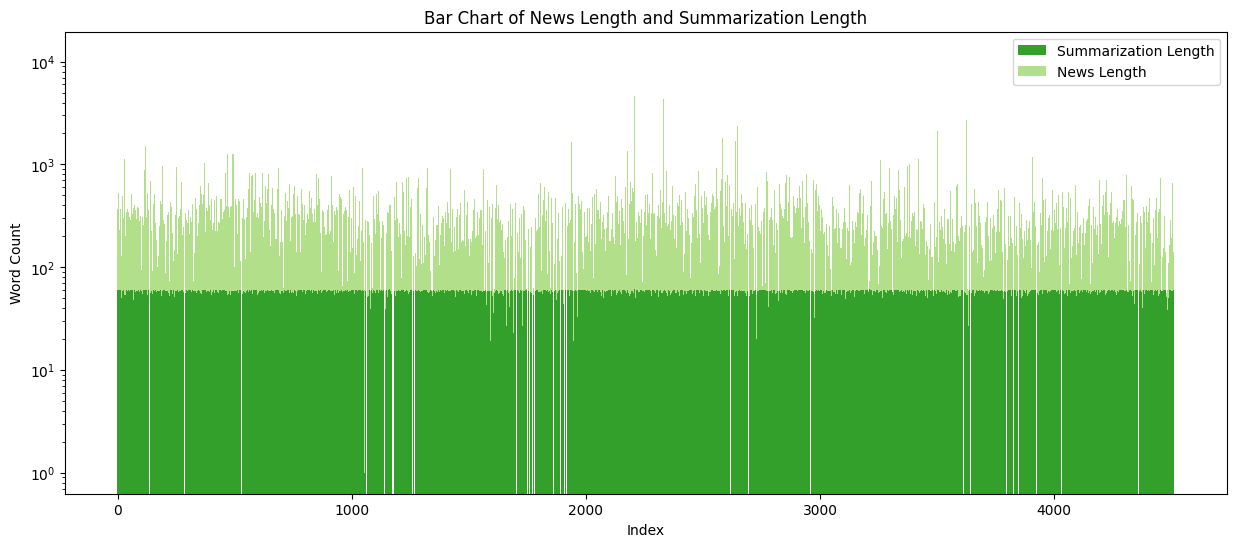

In [ ]:
# Calculate the difference between 'ctext_length' and 'text_length' and store it in a new column 'diff'
df['diff'] = df['ctext_length'] - df['text_length']

# Set colors for the bar chart
color1 = sns.color_palette("Paired")[3]
color2 = sns.color_palette("Paired")[2]

# Set the size of the figure
plt.figure(figsize=(15, 6))

# Create a bar chart for 'text_length'
bar1 = plt.bar(df.index, df['text_length'], color=color1, label='Summarization Length', width=1.0)

# Create a bar chart for the difference between 'ctext_length' and 'text_length'
# The 'bottom' parameter is used to stack the bars on top of each other
bar2 = plt.bar(df.index, df['diff'], bottom=df['text_length'], color=color2, label='News Length', width=1.0)

# Set labels and title for the chart
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Bar Chart of News Length and Summarization Length')
plt.legend()

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Display the bar chart
plt.show()

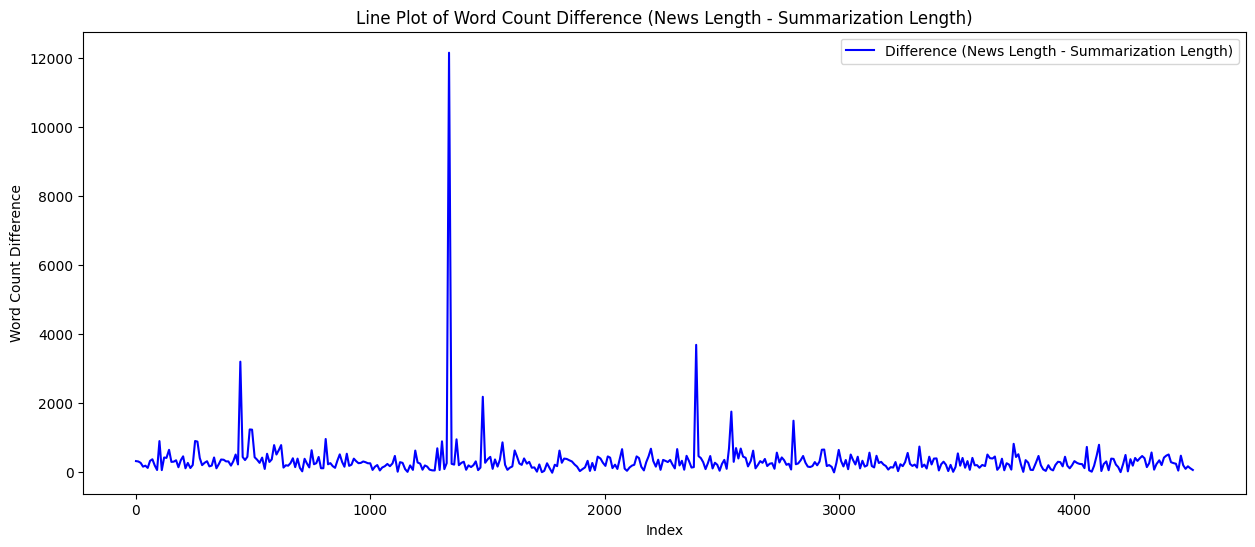

In [ ]:
# Set the size of the figure
plt.figure(figsize=(15, 6))

# Choose a subset of data points for better visibility (e.g., every 10th data point)
subset_indices = range(0, len(df), 10)

# Create a scatter plot with connected lines for the chosen subset
plt.plot(df.index[subset_indices], df['diff'].iloc[subset_indices], linestyle='-', color='blue', label='Difference (News Length - Summarization Length)')

# Set labels and title for the chart
plt.xlabel('Index')
plt.ylabel('Word Count Difference')
plt.title('Line Plot of Word Count Difference (News Length - Summarization Length)')
plt.legend()

# Display the scatter plot with connected lines
plt.show()

# The blue line is above the x-axis, it indicates that the summarizations are shorter than the original news.


In [ ]:
# Drop the specified columns ('headlines_length', 'text_length', 'ctext_length', 'diff') from the DataFrame 'df'
df = df.drop(columns=['headlines_length', 'text_length', 'ctext_length', 'diff'])

# Display the first few rows of the DataFrame after dropping the specified columns
df.head()

,headlines,text,ctext
0,daman & diu revokes mandatory rakshabandhan in...,the administration of union territory daman an...,the daman and diu administration on wednesday ...
1,malaika slams user who trolled her for 'divorc...,malaika arora slammed an instagram user who tr...,"from her special numbers to tv?appearances, bo..."
2,'virgin' now corrected to 'unmarried' in igims...,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...
3,aaj aapne pakad liya: let man dujana before be...,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...
4,hotel staff to get training to spot signs of s...,hotels in maharashtra will train their staff t...,hotels in mumbai and other indian cities are t...


In [ ]:
# Create a new column 'news' by concatenating 'headlines' and 'ctext' columns
df['news'] = df['headlines'] + '. ' + df['ctext']

# Rename the 'text' column to 'summary'
df.rename(columns={"text": "summary"}, inplace=True)

# Drop the specified columns ('headlines', 'ctext') from the DataFrame 'df'
df = df.drop(columns=['headlines', 'ctext'])

# Display the first few rows of the DataFrame after the modifications
df.head()

,summary,news
0,the administration of union territory daman an...,daman & diu revokes mandatory rakshabandhan in...
1,malaika arora slammed an instagram user who tr...,malaika slams user who trolled her for 'divorc...
2,the indira gandhi institute of medical science...,'virgin' now corrected to 'unmarried' in igims...
3,lashkar-e-taiba's kashmir commander abu dujana...,aaj aapne pakad liya: let man dujana before be...
4,hotels in maharashtra will train their staff t...,hotel staff to get training to spot signs of s...


In [ ]:
# Making the dataset
prefix = 'summarize: '
df['news'] = prefix + df['news']
df.head()

,summary,news
0,the administration of union territory daman an...,summarize: daman & diu revokes mandatory raksh...
1,malaika arora slammed an instagram user who tr...,summarize: malaika slams user who trolled her ...
2,the indira gandhi institute of medical science...,summarize: 'virgin' now corrected to 'unmarrie...
3,lashkar-e-taiba's kashmir commander abu dujana...,summarize: aaj aapne pakad liya: let man dujan...
4,hotels in maharashtra will train their staff t...,summarize: hotel staff to get training to spot...


In [ ]:
# Split the original DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.01, shuffle=True)

# Print the shapes of the training and testing sets
print("Train and val shape:", train_df.shape, "Test shape:", test_df.shape)

# Save the global training and testing DataFrames for model inference
global_train_df = train_df
global_test_df = test_df

# Convert the training DataFrame to a Hugging Face Dataset
train_df = datasets.Dataset.from_pandas(train_df)
train_df = train_df.remove_columns(["__index_level_0__"])

# Split the training dataset into training and validation sets
train_df = train_df.train_test_split(test_size=0.2, shuffle=True)

# Display the first part of the training dataset
train_df["train"][0]

Train and val shape: (4352, 2) Test shape: (44, 2)


{'summary': 'state-run indian oil corporation (ioc) on monday signed an agreement to supply over 10 lakh tonnes of petroleum products annually to nepal for the next five years, chairman b ashok said. "the supply agreement... will meet the full requirements, demand and quantities of all the major oil products, including petrol, diesel, kerosene, aviation turbine fuel and lpg," he added.',
 'news': 'summarize: ioc to supply 10l tonnes of fuel to nepal for next 5 years. state-run indian oil corp (ioc) on monday signed an agreement to supply over 1 million tonnes (mt) of petroleum products annually to nepal for the next five years, chairman b. ashok said.all about the agreement "the supply agreement signed today is for the period april 2017 to march 2022 and will meet the full requirements, demand and quantities of all the major oil products, including petrol, diesel, kerosene, aviation turbine fuel and lpg," ashok told reporters here.ioc will supply euro-iv grade petrol and diesel to nepa

In [ ]:
# Fitting into dataset dict
train_val_test_dataset = DatasetDict({
    'train': train_df["train"],
    'val': train_df['test']})

print(type(train_val_test_dataset))
train_val_test_dataset# Create a DatasetDict containing the training and validation sets
train_val_test_dataset = DatasetDict({
    'train': train_df["train"],  # Training set
    'val': train_df['test']      # Validation set
})

# Print the type of the train_val_test_dataset object
print(type(train_val_test_dataset))

# Display the content of the train_val_test_dataset object
train_val_test_dataset

<class 'datasets.dataset_dict.DatasetDict'>
<class 'datasets.dataset_dict.DatasetDict'>


DatasetDict({
    train: Dataset({
        features: ['summary', 'news'],
        num_rows: 3481
    })
    val: Dataset({
        features: ['summary', 'news'],
        num_rows: 871
    })
})

In [ ]:
# Specify the pre-trained T5 model name
model_name = "t5-base"

# Load the T5 tokenizer from the Hugging Face Transformers library
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
def prepare_dataset(data):
    # Extract the 'news' text from the input data
    inputs = data["news"]

    # Tokenize the 'news' text using the tokenizer with specified parameters
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)

    # Tokenize the 'summary' text using the tokenizer with specified parameters
    labels = tokenizer(text_target=data["summary"], max_length=128, truncation=True)

    # Add the tokenized 'labels' to the model inputs
    model_inputs["labels"] = labels["input_ids"]

    # Return the prepared model inputs
    return model_inputs

In [ ]:
# Apply the prepare_dataset function to tokenize the "news" and "summary" data in the training set
# The batched parameter enables processing the data in batches for efficiency
tokenized_data = train_val_test_dataset.map(prepare_dataset, batched=True)

# Display the tokenized training set
tokenized_data["train"]

Map:   0%|          | 0/3481 [00:00<?, ? examples/s]

Map:   0%|          | 0/871 [00:00<?, ? examples/s]

Dataset({
    features: ['summary', 'news', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 3481
})

In [ ]:
# Create a DataCollatorForSeq2Seq object for padding sequences during training
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model_name)

In [ ]:
def compute_metrics(eval_pred):
    # Unpack the predictions and labels from the evaluation predictions
    predictions, labels = eval_pred

    # Decode the predicted sequences, skipping special tokens
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Replace tokens with padding token if the original label was masked during training
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    # Decode the labels, skipping special tokens
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute ROUGE scores using the decoded predictions and labels
    result = Rouge().get_scores(decoded_preds, decoded_labels, avg=True, ignore_empty=True)

    # Uncomment the following lines if you want to include the average generated length as a metric
    # prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    # result["gen_len"] = np.mean(prediction_lens)

    # Return the computed ROUGE scores
    return result

In [ ]:
# Check if a GPU (cuda) is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the T5 model for sequence-to-sequence learning from the Hugging Face Transformers library
T5model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer, EarlyStoppingCallback

# Set up hyperparameters for training with early stopping
training_args = Seq2SeqTrainingArguments(
    output_dir="t5-news",                  # Output directory for saving model checkpoints
    evaluation_strategy="steps",           # Evaluate every `eval_steps`
    eval_steps=500,                         # Number of steps between evaluations
    learning_rate=2e-5,                     # Learning rate for optimization
    per_device_train_batch_size=4,         # Batch size for training on each device
    per_device_eval_batch_size=4,          # Batch size for evaluation on each device
    weight_decay=0.01,                      # Weight decay for regularization
    save_total_limit=2,                     # Limit on the total number of checkpoints to save
    num_train_epochs=20,                   # A large number of training epochs
    predict_with_generate=True,             # Use generation during evaluation
    fp16=True,                              # Use mixed-precision training (fp16)
    report_to="none",                       # Disable logging to external services
    load_best_model_at_end=True,           # Load the best model at the end of training
    save_strategy="steps",                 # Save checkpoints every `save_steps`
    save_steps=500,                         # Number of steps between checkpoint saves
    logging_dir="t5-news/logs",            # Directory for storing logs
    logging_steps=100,                      # Log every `logging_steps` steps
    push_to_hub=False,                      # Do not push the model to the Hugging Face Model Hub
)

early_stop = EarlyStoppingCallback(2, 1.0)

In [ ]:
# Set up the Seq2SeqTrainer
trainer = Seq2SeqTrainer(
    model=T5model,                         # The T5 model for training
    args=training_args,                    # Training hyperparameters
    train_dataset=tokenized_data["train"], # Training dataset
    eval_dataset=tokenized_data["val"],    # Evaluation dataset
    tokenizer=tokenizer,                   # Tokenizer for the dataset
    data_collator=data_collator,           # Data collator for padding sequences
    compute_metrics=compute_metrics        # Function for computing evaluation metrics
)

In [ ]:
import torch
torch.cuda.empty_cache()
# Initiate the training process using the trainer
trainer.train()

Step,Training Loss,Validation Loss,Rouge-1,Rouge-2,Rouge-l
500,1.042600,1.257046,"{'r': 0.15882450155533018, 'p': 0.7024318106272585, 'f': 0.25632990559099605}","{'r': 0.07498155815247258, 'p': 0.42333491980955945, 'f': 0.12602931800106207}","{'r': 0.14796338231634457, 'p': 0.6557154244455865, 'f': 0.23888251969503743}"
1000,1.016800,1.260821,"{'r': 0.1573126934462682, 'p': 0.693439974963916, 'f': 0.25364993411250525}","{'r': 0.07413210962764882, 'p': 0.41453495308935234, 'f': 0.12438879385278954}","{'r': 0.1464054838589999, 'p': 0.6465970708077486, 'f': 0.23615297839278396}"
1500,1.044600,1.259937,"{'r': 0.15986297075791228, 'p': 0.7025682801548946, 'f': 0.25767649933929704}","{'r': 0.07512731698727187, 'p': 0.4203185659143983, 'f': 0.1260918432674679}","{'r': 0.14856001529593113, 'p': 0.6539828956827678, 'f': 0.23953379712721906}"
2000,0.998200,1.264032,"{'r': 0.15741798773687365, 'p': 0.6997959772306368, 'f': 0.2542764649065383}","{'r': 0.07384053367690209, 'p': 0.41681569154976916, 'f': 0.1241123030891428}","{'r': 0.14628638458927565, 'p': 0.6513208980411997, 'f': 0.23635976790599758}"
2500,0.987400,1.266047,"{'r': 0.15794902543231598, 'p': 0.6999735272756481, 'f': 0.25499825536278814}","{'r': 0.07374062158942261, 'p': 0.41627220883991256, 'f': 0.12395249968608825}","{'r': 0.1466159847279039, 'p': 0.6510436685733848, 'f': 0.2367847467590528}"
3000,0.929200,1.273399,"{'r': 0.15843964188102522, 'p': 0.6996634782977385, 'f': 0.2556622063192018}","{'r': 0.07375571149186527, 'p': 0.41452596698679595, 'f': 0.12387133419188312}","{'r': 0.14695340291492417, 'p': 0.6502089890816508, 'f': 0.23720380832734805}"
3500,0.968900,1.276057,"{'r': 0.15877022962747592, 'p': 0.6999164569925012, 'f': 0.25605321107528417}","{'r': 0.07469194519669799, 'p': 0.41911145516872483, 'f': 0.12542097260411667}","{'r': 0.14757791465315703, 'p': 0.6519097136364305, 'f': 0.23808921685644294}"
4000,0.964100,1.280157,"{'r': 0.15851928511186478, 'p': 0.7019665635235972, 'f': 0.25589052044871846}","{'r': 0.07429679691622754, 'p': 0.41755656069240793, 'f': 0.12478871069228117}","{'r': 0.14713786787502342, 'p': 0.652369368285827, 'f': 0.23756230309726037}"
4500,0.908900,1.287854,"{'r': 0.15758317724624155, 'p': 0.7001457770409953, 'f': 0.2545490330222206}","{'r': 0.07398095846288222, 'p': 0.4167544494855895, 'f': 0.1243302470190673}","{'r': 0.14681352350283805, 'p': 0.6530603361992232, 'f': 0.2372068940760801}"
5000,0.937000,1.287241,"{'r': 0.15704137907310936, 'p': 0.6969350466362007, 'f': 0.253594203681013}","{'r': 0.07350808947058407, 'p': 0.413709152875594, 'f': 0.12353134647894636}","{'r': 0.14579605512874164, 'p': 0.6483030626577595, 'f': 0.23552564632308162}"


Step,Training Loss,Validation Loss,Rouge-1,Rouge-2,Rouge-l
500,1.042600,1.257046,"{'r': 0.15882450155533018, 'p': 0.7024318106272585, 'f': 0.25632990559099605}","{'r': 0.07498155815247258, 'p': 0.42333491980955945, 'f': 0.12602931800106207}","{'r': 0.14796338231634457, 'p': 0.6557154244455865, 'f': 0.23888251969503743}"
1000,1.016800,1.260821,"{'r': 0.1573126934462682, 'p': 0.693439974963916, 'f': 0.25364993411250525}","{'r': 0.07413210962764882, 'p': 0.41453495308935234, 'f': 0.12438879385278954}","{'r': 0.1464054838589999, 'p': 0.6465970708077486, 'f': 0.23615297839278396}"
1500,1.044600,1.259937,"{'r': 0.15986297075791228, 'p': 0.7025682801548946, 'f': 0.25767649933929704}","{'r': 0.07512731698727187, 'p': 0.4203185659143983, 'f': 0.1260918432674679}","{'r': 0.14856001529593113, 'p': 0.6539828956827678, 'f': 0.23953379712721906}"
2000,0.998200,1.264032,"{'r': 0.15741798773687365, 'p': 0.6997959772306368, 'f': 0.2542764649065383}","{'r': 0.07384053367690209, 'p': 0.41681569154976916, 'f': 0.1241123030891428}","{'r': 0.14628638458927565, 'p': 0.6513208980411997, 'f': 0.23635976790599758}"
2500,0.987400,1.266047,"{'r': 0.15794902543231598, 'p': 0.6999735272756481, 'f': 0.25499825536278814}","{'r': 0.07374062158942261, 'p': 0.41627220883991256, 'f': 0.12395249968608825}","{'r': 0.1466159847279039, 'p': 0.6510436685733848, 'f': 0.2367847467590528}"
3000,0.929200,1.273399,"{'r': 0.15843964188102522, 'p': 0.6996634782977385, 'f': 0.2556622063192018}","{'r': 0.07375571149186527, 'p': 0.41452596698679595, 'f': 0.12387133419188312}","{'r': 0.14695340291492417, 'p': 0.6502089890816508, 'f': 0.23720380832734805}"
3500,0.968900,1.276057,"{'r': 0.15877022962747592, 'p': 0.6999164569925012, 'f': 0.25605321107528417}","{'r': 0.07469194519669799, 'p': 0.41911145516872483, 'f': 0.12542097260411667}","{'r': 0.14757791465315703, 'p': 0.6519097136364305, 'f': 0.23808921685644294}"
4000,0.964100,1.280157,"{'r': 0.15851928511186478, 'p': 0.7019665635235972, 'f': 0.25589052044871846}","{'r': 0.07429679691622754, 'p': 0.41755656069240793, 'f': 0.12478871069228117}","{'r': 0.14713786787502342, 'p': 0.652369368285827, 'f': 0.23756230309726037}"
4500,0.908900,1.287854,"{'r': 0.15758317724624155, 'p': 0.7001457770409953, 'f': 0.2545490330222206}","{'r': 0.07398095846288222, 'p': 0.4167544494855895, 'f': 0.1243302470190673}","{'r': 0.14681352350283805, 'p': 0.6530603361992232, 'f': 0.2372068940760801}"
5000,0.937000,1.287241,"{'r': 0.15704137907310936, 'p': 0.6969350466362007, 'f': 0.253594203681013}","{'r': 0.07350808947058407, 'p': 0.413709152875594, 'f': 0.12353134647894636}","{'r': 0.14579605512874164, 'p': 0.6483030626577595, 'f': 0.23552564632308162}"


- **Epoch 1:**
  - Training Loss: Not provided
  - Validation Loss: 1.312093
  - Rouge-1: {'r': 0.149, 'p': 0.663, 'f': 0.241}
  - Rouge-2: {'r': 0.067, 'p': 0.383, 'f': 0.113}
  - Rouge-L: {'r': 0.139, 'p': 0.618, 'f': 0.224}

  The model in Epoch 1 has a relatively low recall across all Rouge measures, indicating that it might miss important content from the reference summaries. Precision is higher, suggesting that the generated summaries contain a substantial amount of correct content, but it might be over-representing certain elements.

- **Epoch 2:**
  - Training Loss: 1.511
  - Validation Loss: 1.286475
  - Rouge-1: {'r': 0.153, 'p': 0.677, 'f': 0.247}
  - Rouge-2: {'r': 0.071, 'p': 0.397, 'f': 0.119}
  - Rouge-L: {'r': 0.142, 'p': 0.63, 'f': 0.23}

  There's a slight improvement in Rouge scores from Epoch 1 to Epoch 2. However, recall values are still relatively low, indicating that the model might not fully capture the content from the reference summaries.

- **Epoch 3:**
  - Training Loss: 1.3885
  - Validation Loss: 1.274483
  - Rouge-1: {'r': 0.155, 'p': 0.687, 'f': 0.25}
  - Rouge-2: {'r': 0.073, 'p': 0.409, 'f': 0.122}
  - Rouge-L: {'r': 0.144, 'p': 0.64, 'f': 0.233}

  Rouge scores continue to show a gradual improvement. The recall is increasing, suggesting better coverage of important information in the generated summaries. Precision remains relatively high, and the F1-score reflects a balanced performance.

- **Epoch 4:**
  - Training Loss: 1.3486
  - Validation Loss: 1.273445
  - Rouge-1: {'r': 0.156, 'p': 0.689, 'f': 0.251}
  - Rouge-2: {'r': 0.073, 'p': 0.412, 'f': 0.123}
  - Rouge-L: {'r': 0.145, 'p': 0.642, 'f': 0.234}

  Rouge scores continue to improve, with a slight increase in recall and precision. The F1-score reflects a reasonable balance between precision and recall.

Overall, the Rouge scores indicate that the model is gradually improving in capturing content from the reference summaries, but there is still room for enhancement, especially in terms of recall.

The training loss decreases over epochs, indicating potential learning by the model. Validation loss decreases as well, suggesting improvement in generalization.

In [ ]:
# Specify the directory path to save the model
model_path = "t5-news"

# Save the trained T5 model to the specified directory
trainer.save_model(model_path)

# Save the tokenizer associated with the model to the same directory
tokenizer.save_pretrained(model_path)

In [ ]:
# load the model
model = AutoModelForSeq2SeqLM.from_pretrained('/content/t5-news')

In [ ]:
from transformers import pipeline, T5Tokenizer, T5ForConditionalGeneration

# Define the file reading function
def read_article(file_name):
    # Step 1: Read the content of the file and split it into sentences
    with open(file_name, "r", encoding="utf-8") as file:
        filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        # Preprocess each sentence
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop()

    return sentences

In [ ]:
# Specify the file name
file_name = '/content/extracted_content/example/msft.txt'

# Read the article from the file
sentences = read_article(file_name)

# Concatenate sentences into a single string (paragraph)
paragraph = " ".join([" ".join(sentence) for sentence in sentences])

# Use the pipeline for summarization
summarizer = pipeline("summarization", model=T5model, tokenizer=tokenizer, device=0)  # Specify the device (0 for cuda:0)

# Get the summary for the entire paragraph
summary = summarizer(paragraph, max_length=100, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)

# Print the summary text
print("Original:", paragraph)
print("Summary:", summary[0]['summary_text'])


Original: In an attempt to build an AI-ready workforce, Microsoft announced Intelligent Cloud Hub which has been launched to empower the next generation of students with AI-ready skills Envisioned as a three-year collaborative program, Intelligent Cloud Hub will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services As part of the program, the Redmond giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses The company will provide AI development tools and Azure AI services such as Microsoft Cognitive Services, Bot Services and Azure Machine Learning.According to Manish Prakash, Country General Manager-PS, Health and Education, Microsoft India, said, "With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset This will require more collaborations and training and working with AI That’s why it has become more critical than ever for educational institutions to integrate new cloud and AI technologies The program is an attempt to ramp up the institutional set-up and build capabilities among the educators to educate the workforce of tomorrow." The program aims to build up the cognitive skills and in-depth understanding of developing intelligent cloud connected solutions for applications across industry Earlier in April this year, the company announced Microsoft Professional Program In AI as a learning track open to the public The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well.

Summary: in an attempt to build an AI-ready workforce, Microsoft has announced Intelligent Cloud Hub which will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. "With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillet," said Manish Prakash.

In [ ]:
from rouge import Rouge

# Your original text and generated summary
original_text = paragraph
generated_summary = summary[0]['summary_text']

# Initialize the Rouge object
rouge = Rouge()

# Calculate ROUGE scores
scores = rouge.get_scores(generated_summary, original_text)

# Print the scores
print("ROUGE Scores:")
print(scores)

ROUGE-1:

Precision (p): 0.947
Recall (r): 0.314
F1-score (f): 0.472

ROUGE-2:

Precision (p): 0.866
Recall (r): 0.210
F1-score (f): 0.338

ROUGE-L:

Precision (p): 0.895
Recall (r): 0.297
F1-score (f): 0.445

These scores suggest relatively high precision in matching unigrams (ROUGE-1) and capturing the longest common subsequence (ROUGE-L). However, the recall values are on the lower side, indicating that the generated summary may not effectively cover all the important information from the original text. The F1-score, balancing precision and recall, reflects a moderate overall performance.

In [ ]:
# Specify the file name
file_name = '/content/extracted_content/example/space.txt'

# Read the article from the file
sentences = read_article(file_name)

# Concatenate sentences into a single string (paragraph)
paragraph = " ".join([" ".join(sentence) for sentence in sentences])

# Use the pipeline for summarization
summarizer = pipeline("summarization", model=T5model, tokenizer=tokenizer, device=0)  # Specify the device (0 for cuda:0)

# Get the summary for the entire paragraph
summary = summarizer(paragraph, max_length=100, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)

# Print the summary text
print("Original:", paragraph)
print("Summary:", summary[0]['summary_text'])


Original: A white hole is a bizarre cosmic object which is intensely bright, and from which matter gushes rather than disappears In other words, it’s the exact opposite of a black hole But unlike black holes, there’s no consensus about whether white holes exist, or how they’d be formed.They are predicted by Einstein’s theory of gravity, and are most often mentioned in the context of ‘wormholes’, in which a black hole acts as the entry point to a tunnel through space and time, ending in a white hole somewhere else in the Universe But this is deeply controversial, because Einstein’s theory predicts the existence of a so-called singularity at the centre of black holes – a state of infinite gravity which would prevent anything from passing through to the white hole on the other side The process starts when an old massive star collapses under its own weight and forms a black hole But then, quantum effects occurring around the surface of the black hole halt further collapse to a singularity, and instead begin to gradually turn the black hole into a white hole that’s spewing out the original star matter again

Summary: unlike black holes, there’s no consensus about whether white holes exist, or how they’d be formed. they are predicted by Einstein’s theory of gravity, and are most often mentioned in the context of ‘wormholes’, in which a black hole acts as the entry point to a tunnel through space and time, ending in a white hole somewhere else in the Universe.

In [ ]:
from rouge import Rouge

# Your original text and generated summary
original_text = paragraph
generated_summary = summary[0]['summary_text']

# Initialize the Rouge object
rouge = Rouge()

# Calculate ROUGE scores
scores = rouge.get_scores(generated_summary, original_text)

# Print the scores
print("ROUGE Scores:")
print(scores)

ROUGE-1:

Precision (p): 0.979
Recall (r): 0.385
F1-score (f): 0.553

ROUGE-2:

Precision (p): 0.966
Recall (r): 0.326
F1-score (f): 0.487

ROUGE-L:

Precision (p): 0.979
Recall (r): 0.385
F1-score (f): 0.553

These scores indicate high precision in matching unigrams (ROUGE-1) and capturing the longest common subsequence (ROUGE-L). However, the recall values are relatively low, suggesting that the generated summary may not effectively capture all the essential content from the original text. The F1-score provides a balance between precision and recall, reflecting a moderate overall performance.

In [ ]:
# Specify the file name
file_name = '/content/extracted_content/example/computer.txt'

# Read the article from the file
sentences = read_article(file_name)

# Concatenate sentences into a single string (paragraph)
paragraph = " ".join([" ".join(sentence) for sentence in sentences])

# Use the pipeline for summarization
summarizer = pipeline("summarization", model=T5model, tokenizer=tokenizer, device=0)  # Specify the device (0 for cuda:0)

# Get the summary for the entire paragraph
summary = summarizer(paragraph, max_length=100, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)

# Print the summary text
print("Original:", paragraph)
print("Summary:", summary[0]['summary_text'])


Original : A computer is a machine that can be programmed to carry out sequences of arithmetic or logical operations automatically Modern digital electronic computers can perform generic sets of operations known as programs These programs enable computers to perform a wide range of tasks A computer system is a nominally complete computer that includes the hardware, operating system, and peripheral equipment needed and used for full operation This term may also refer to a group of computers that are linked and function together, such as a computer network or computer cluster A broad range of industrial and consumer products use computers as control systems Simple special-purpose devices like microwave ovens and remote controls are included, as are factory devices like industrial robots and computer-aided design, as well as general-purpose devices like personal computers and mobile devices like smartphones.

Summary: a computer is a machine that can be programmed to carry out sequences of arithmetic or logical operations automatically Modern digital electronic computers can perform generic sets of operations known as programs These programs enable computers to perform a wide range of tasks A computer system includes the hardware, operating system, and peripheral equipment needed and function together, such as a network or computer cluster A broad range of industrial and consumer products use computers as control systems.

In [ ]:
from rouge import Rouge

# Your original text and generated summary
original_text = paragraph
generated_summary = summary[0]['summary_text']

# Initialize the Rouge object
rouge = Rouge()

# Calculate ROUGE scores
scores = rouge.get_scores(generated_summary, original_text)

# Print the scores
print("ROUGE Scores:")
print(scores)

ROUGE-1:

Precision (p): 1.000
Recall (r): 0.636
F1-score (f): 0.778

ROUGE-2:

Precision (p): 0.974
Recall (r): 0.569
F1-score (f): 0.718

ROUGE-L:

Precision (p): 1.000
Recall (r): 0.636
F1-score (f): 0.778

These scores suggest high precision in terms of matching unigrams (ROUGE-1) and capturing the longest common subsequence (ROUGE-L). However, recall values indicate that there may be some content from the original text that is not well-represented in the generated summary. The F1-score balances precision and recall, providing a measure of overall performance, and in this case, it reflects a reasonably good balance.

## References

https://www.kaggle.com/datasets/sunnysai12345/news-summary

https://www.kaggle.com/code/zifengjiang/news-summarization-t5-pegasus-and-bart

https://medium.com/nlplanet/a-full-guide-to-finetuning-t5-for-text2text-and-building-a-demo-with-streamlit-c72009631887

https://github.com/abhimishra91/transformers-tutorials/blob/master/transformers_summarization_wandb.ipynb